In [21]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure 
from sklearn.linear_model import LinearRegression

%matplotlib inline

df=pd.read_csv(r'C:\Users\Roxana\Downloads\Salary_dataset.csv')


In [19]:
#display data
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [9]:
#looking for any missing data
for col in df.columns:
    pct_missing= np.mean(df[col].isnull())
    print('{}-{}%'.format(col,pct_missing))


Unnamed: 0-0.0%
YearsExperience-0.0%
Salary-0.0%


In [75]:
#looking at data types
print(df.dtypes)

Unnamed: 0           int64
YearsExperience    float64
Salary             float64
dtype: object


In [85]:
#converting data types stored as string 
df['YearsExperience']= pd.to_numeric(df['YearsExperience'], errors='coerce')
df['Salary']= pd.to_numeric(df['Salary'], errors='coerce')

In [47]:
#looking at min and max for years of experienec
min_value= df['YearsExperience'].min()
max_value= df['YearsExperience'].max()

print(min_value, max_value)

1.2000000000000002 10.6


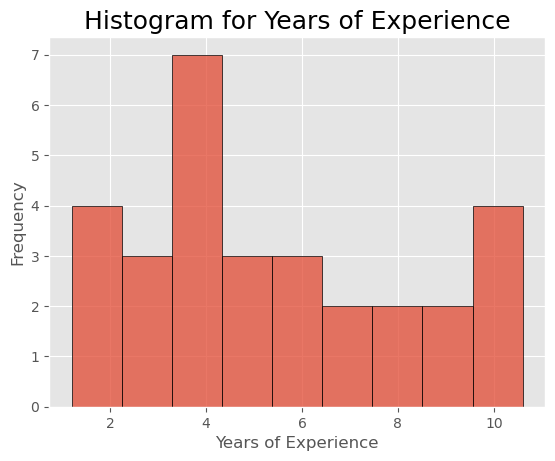

In [159]:

#histogram for years of experience
sns.histplot(df['YearsExperience'], binwidth=1, edgecolor='black')
plt.title('Histogram for Years of Experience', fontsize=18)
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')

plt.show()

In [59]:
#looking at min and max for salary
min_value= df['Salary'].min()
max_value= df['Salary'].max()

print( min_value, max_value)

37732.0 122392.0


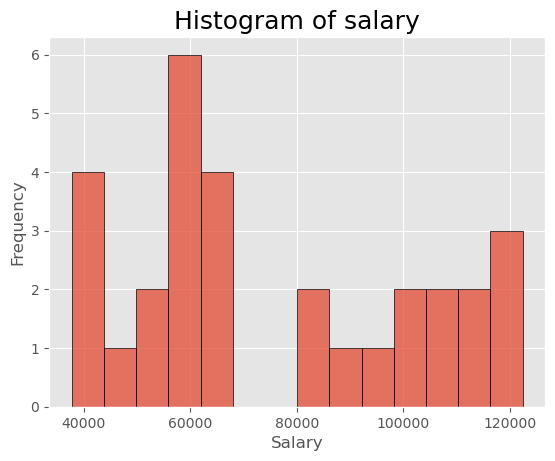

In [149]:
#histogram of Salary
sns.histplot(df['Salary'], binwidth=6000, edgecolor='black')
plt.title('Histogram of salary', fontsize=18)
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

In [171]:
# Statistic values for salary
mean_salary = df['Salary'].mean()
median_salary = df['Salary'].median()
variance_salary=df['Salary'].var()
stdeviation=df['Salary'].std()
print("Mean salary =", round(mean_salary,2))
print("Median salary=", round(mean_salary,2))
print("Variance salary=", round(mean_salary,2))
print('Standard deviaion salary=', round(stdeviation, 2))


Mean salary = 76004.0
Median salary= 76004.0
Variance salary= 76004.0
Standard deviaion salary= 27414.43


In [180]:
#Statistic values for years of experience
mean_year_experience=df['YearsExperience'].mean()
median_year_experience=df['YearsExperience'].median()
variance_year_experience=df['YearsExperience'].var()
stdeviation_year_experience=df['YearsExperience'].std()
print('Mean for years of experience=', round(mean_year_experience, 2))
print("Median for years of experience=", round(median_year_experience,2))
print("Variance for years of experience=", round(variance_year_experience,2))
print('Standard deviaion for years of experience=', round(stdeviation_year_experience, 2))


Mean for years of experience= 5.41
Median for years of experience= 4.8
Variance for years of experience= 8.05
Standard deviaion for years of experience= 2.84


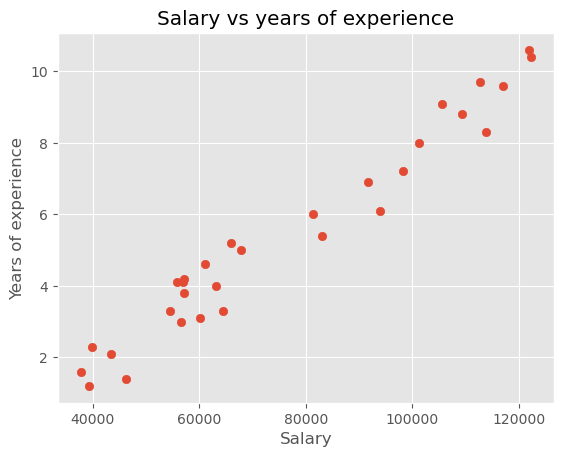

In [186]:
#scatterplot salary vs year of experience
plt.scatter(df['Salary'], df['YearsExperience'] )
plt.title('Salary vs years of experience')
plt.xlabel('Salary')
plt.ylabel('Years of experience')
plt.show()

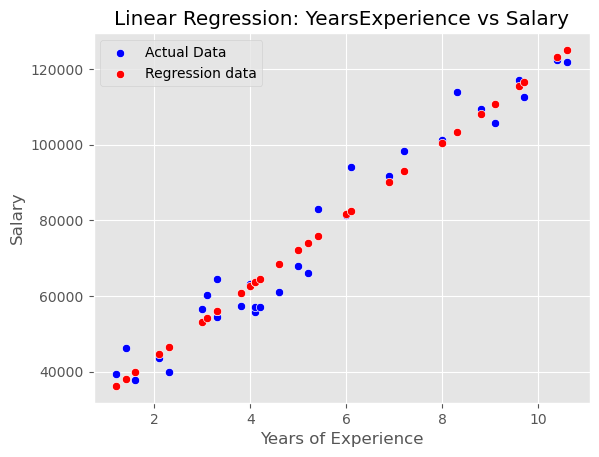

In [38]:
# Define X (independent) and Y (dependent)
X = df[['YearsExperience']]  # Predictor variable
y = df['Salary']  # Target variable

# Create model and fit data
model = LinearRegression()
model.fit(X, y)

# Predict values
df['Predicted Salary'] = model.predict(X)

# Plot
sns.scatterplot(x=df['YearsExperience'], y=df['Salary'], label="Actual data", color="blue")
sns.scatterplot(x=df['YearsExperience'], y=df['Predicted Salary'], label="Regression data", color="red")

plt.title("Linear Regression: YearsExperience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()